# Apprentice Chef Dataset Exploration

In [1]:
# importing libraries
import pandas as pd             # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns           # enhanced graphical output
import numpy as np              # data science essentials

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Apprentice_Chef_Dataset.xlsx'


# reading the file into Python
apprentice = pd.read_excel(file)

FileNotFoundError: [Errno 2] No such file or directory: './Apprentice_Chef_Dataset.xlsx'

In [2]:
# using .shape to view (ROWS, COLUMNS)
apprentice.shape

(1946, 28)

In [3]:
# column names
print(apprentice.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')


In [4]:
#rename LARGEST_ORDER_SIZE to AVG_MEALS_ORDERED
apprentice = apprentice.rename(columns={'LARGEST_ORDER_SIZE': 'AVG_MEALS_ORDERED'})

In [5]:
# displaying the first rows of the DataFrame
apprentice.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVG_MEALS_ORDERED,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [6]:
# Information about each variable
apprentice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

Analyzing the Distrbution of Revenues Projected From Customers Within Their First Year of Using the Apprentice Chef Service.

The Y-variable (REVENUE) is encoded as a float as it contains decimal places.
We expect to develop a general understanding as to what features affect the revenues generated from each customer  within the first year of using Apprentice Chef.
 

Develop a histogram to analyze the distribution of the Y-variable(REVENUES)

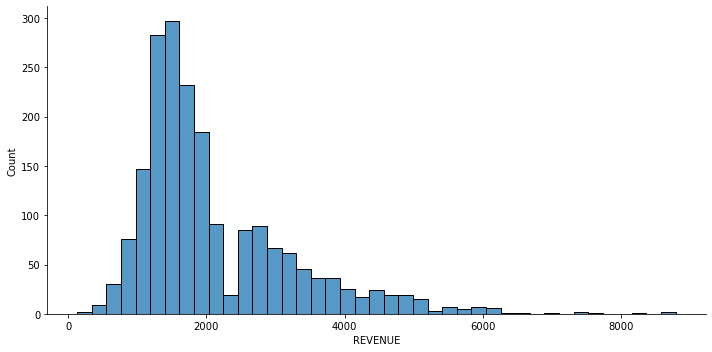

In [7]:
# developing a histogram using DISPLOT
sns.displot(data   = apprentice,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)


# displaying the histogram
plt.show()

The histogram appears to be positively skewed. This will be transformed later.
The revenues seem to be continuous so we will approach our predictive modeling challenge with a linear modeling technique.

We will use descriptive statistics to identify X-variables that meet the assumption that all of the variables in our model are continuous.

In [8]:
# descriptive statistics for numeric data
apprentice.describe(include = 'number').round(decimals = 2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVG_MEALS_ORDERED,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,1.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,564.20,11.00,3.00,5.00,19.00,1600.00


Based on the outputs above,the data types of each original variable in the dataset are assumed to be as follows.

# Review of Missing Value Analysis and Imputation

a) Use method chaining to show the number of missing values in the dataset.

In [9]:


# taking the housing dataset
# and then
# transforming it into boolean based on if a value is null
# and then
# summing together the results per column

apprentice.isna().sum()

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
AVG_MEALS_ORDERED               0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

b) Flag missing values

In [10]:
# looping to detect features with missing values
for col in apprentice:

    # creating columns with 1s if missing and 0 if not
    if apprentice[col].isnull().astype(int).sum() > 0:
        apprentice['m_'+col] = apprentice[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
apprentice[    ['m_FAMILY_NAME']    ].sum(axis = 0)

m_FAMILY_NAME    47
dtype: int64

c) Impute the missing values for FAMILY_NAME with the description found in paranthesis in NAME.

Imputing the decription found in paranthesis in the (NAME) coloumn would be appropriate. This strategy assumes that the reason this data is missing is simply because these people have no family names or are usually called by their description. For example: Bethany is known "Blushing Bethany". That is why the description will be inserted in the null (FAMILY_NAME) column.

In [11]:
#splitting NAME from the person's descirption at '(' 
#place person's description in the family name coulumn with null values

# placeholder list
placeholder_lst = []

# looping over each name:
for index, col in apprentice[apprentice['FAMILY_NAME'].isna()].iterrows():
    
    split_NAME = apprentice.loc[index,'NAME'].split(sep = '(')
    
    apprentice.loc[index,'FAMILY_NAME']= str(split_NAME[1])
    

d) Make sure all missing values have been accounted for.

In [12]:
# making sure all missing values have been taken care of 
#getting an output of 'False'if no null value are present
apprentice.isnull().any().any()

False

# Developing Trend-Based Features

a) Flagging outliers by engineering trend-based features. The aim id to identify where a variable's trend changes in terms of its relationship with revenue from each customer within their first year of using the services.


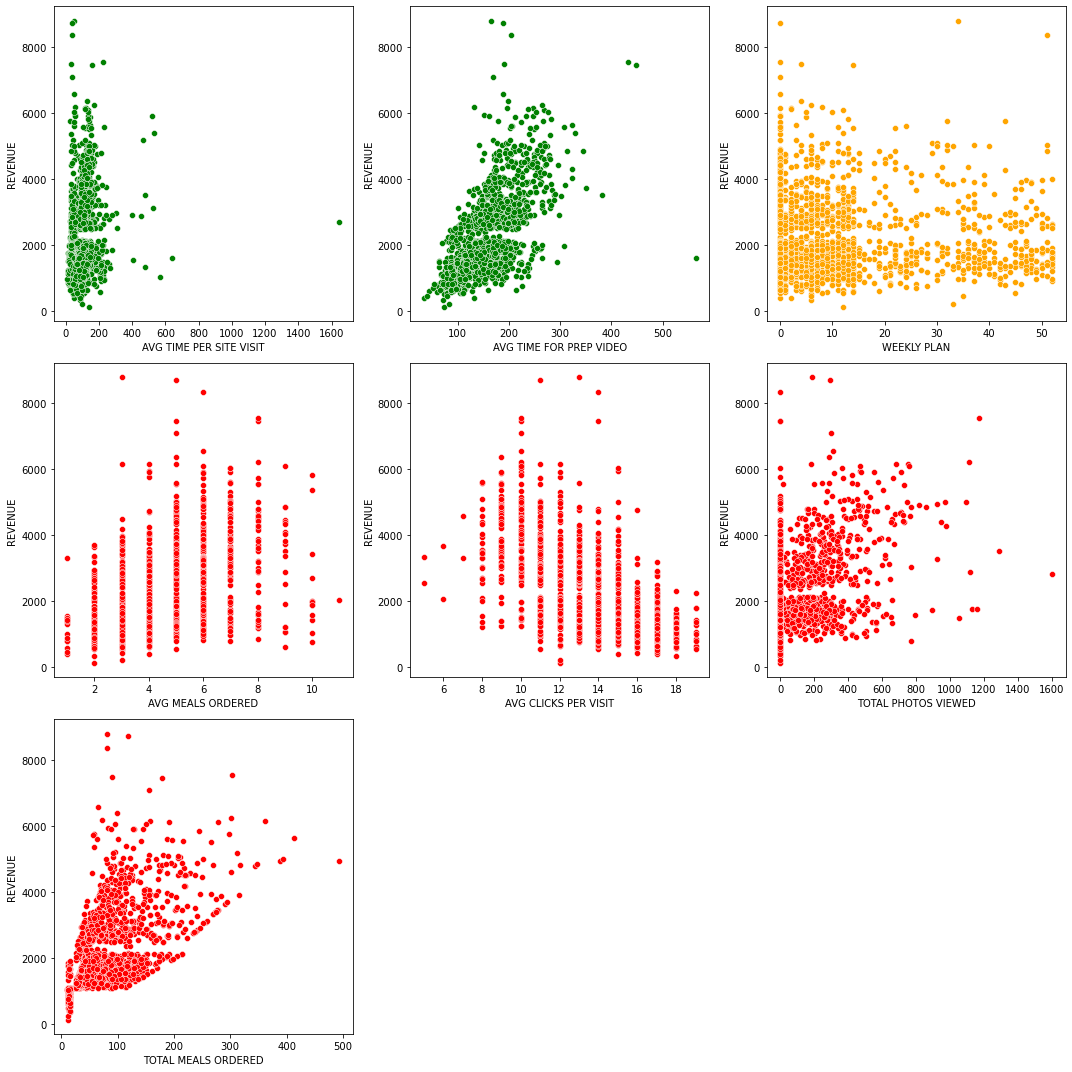

In [13]:
########################
# Visual EDA (Scatterplots)
#between our continuous X-variables and REVENUE.
########################

# setting figure size
fig, ax = plt.subplots(figsize = (15, 15))


# developing a scatterplot
plt.subplot(3, 3, 1)
sns.scatterplot(x = apprentice['AVG_TIME_PER_SITE_VISIT'],
                y = apprentice['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG TIME PER SITE VISIT')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(3, 3, 2)
sns.scatterplot(x = apprentice['AVG_PREP_VID_TIME'],
                y = apprentice['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG TIME FOR PREP VIDEO')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(3, 3, 3)
sns.scatterplot(x = apprentice['WEEKLY_PLAN'],
                y = apprentice['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'WEEKLY PLAN')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(3, 3, 4)
sns.scatterplot(x = apprentice['AVG_MEALS_ORDERED'],
                y = apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG MEALS ORDERED')
plt.ylabel(ylabel = 'REVENUE')


########################
# developing a scatterplot
plt.subplot(3, 3, 5)
sns.scatterplot(x = apprentice['AVG_CLICKS_PER_VISIT'],
                y = apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG CLICKS PER VISIT')
plt.ylabel(ylabel = 'REVENUE')

########################
# developing a scatterplot
plt.subplot(3, 3, 6)
sns.scatterplot(x = apprentice['TOTAL_PHOTOS_VIEWED'],
                y = apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL PHOTOS VIEWED')
plt.ylabel(ylabel = 'REVENUE')

########################
# developing a scatterplot
plt.subplot(3, 3, 7)
sns.scatterplot(x = apprentice['TOTAL_MEALS_ORDERED'],
                y = apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL MEALS ORDERED')
plt.ylabel(ylabel = 'REVENUE')
########################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()



From the scatter plots above, we can see that 3 features have a high amount of zero values AVG TIME PER VISIT, WEEKLY PLAN and TOTAL PHOTOS VIEWED. Which let's us assume that many customers don't visit the website, not many people subscribe to the weekly plan discount promotion and many people don't click on the website or app photos.

Use subsetting to check the value counts for all variables that appear to have a large amount of zero values.

In [14]:
# counting the number of zeroes
visit_time_zeroes     = len(apprentice['AVG_TIME_PER_SITE_VISIT'][apprentice['AVG_TIME_PER_SITE_VISIT'] == 0])
weekly_plan_zeroes    = len(apprentice['WEEKLY_PLAN'][apprentice['WEEKLY_PLAN'] == 0])
photos_viewed_zeroes  = len(apprentice['TOTAL_PHOTOS_VIEWED'][apprentice['TOTAL_PHOTOS_VIEWED'] == 0])
total_meals_zeroes    = len(apprentice['TOTAL_MEALS_ORDERED'][apprentice['TOTAL_MEALS_ORDERED'] == 0])

# printing a table of the results
print(f"""
                         No\t\tYes
               ------------------------------ 
Time Spent Per Vist     | {visit_time_zeroes}\t\t{len(apprentice)    - visit_time_zeroes }
Weekly Plan             | {weekly_plan_zeroes}\t\t{len(apprentice)   - weekly_plan_zeroes}
Total Photos Viewed     | {photos_viewed_zeroes}\t\t{len(apprentice) - photos_viewed_zeroes}
Total Meals Ordered     | {total_meals_zeroes}\t\t{len(apprentice)   - total_meals_zeroes}

""")


                         No		Yes
               ------------------------------ 
Time Spent Per Vist     | 0		1946
Weekly Plan             | 468		1478
Total Photos Viewed     | 1140		806
Total Meals Ordered     | 0		1946




Based on the table above the 'Weekly Plan Subscription' and 'Total Photos Viewed' will be feature engineered since we have more than a 100 observation in each 'Yes' and 'No' columns. 
We can also see that the 'Time Spent Per Vist' turned out to have no zeroes, and the zero assumption was concluded probably due to the prevalence of the outlier which pushed the model on the subplot back.


In [15]:
# dummy variable for weekly plan, total photos viewed, median meal rating
apprentice   ['has_WEEKLY_PLAN']= 0
apprentice   ['has_TOTAL_PHOTOS_VIEWED']= 0


for index, value in apprentice.iterrows():
    
    # WEEKLY_PLAN
    if apprentice.loc[index, 'WEEKLY_PLAN'] > 0:
        apprentice.loc[index,'has_WEEKLY_PLAN'] = 1
   
    # TOTAL_PHOTOS_VIEWED
    if apprentice.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        apprentice.loc[index,'has_TOTAL_PHOTOS_VIEWED'] = 1
        

In [16]:
# checking results
apprentice[['has_WEEKLY_PLAN','has_TOTAL_PHOTOS_VIEWED']].head()



,has_WEEKLY_PLAN,has_TOTAL_PHOTOS_VIEWED
0,0,0
1,1,1
2,1,0
3,1,0
4,1,1


Checking the correlation of this new feature with revenue.

In [17]:
# developing a small correlation matrix
zeroes_corr = apprentice.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['REVENUE',                                   # Y-variable
               ['has_WEEKLY_PLAN','has_TOTAL_PHOTOS_VIEWED', #X-variable
                ]] \
                .sort_values(ascending = False)

has_TOTAL_PHOTOS_VIEWED    0.372072
has_WEEKLY_PLAN           -0.032196
Name: REVENUE, dtype: float64

# Working with with Interval and Count Data

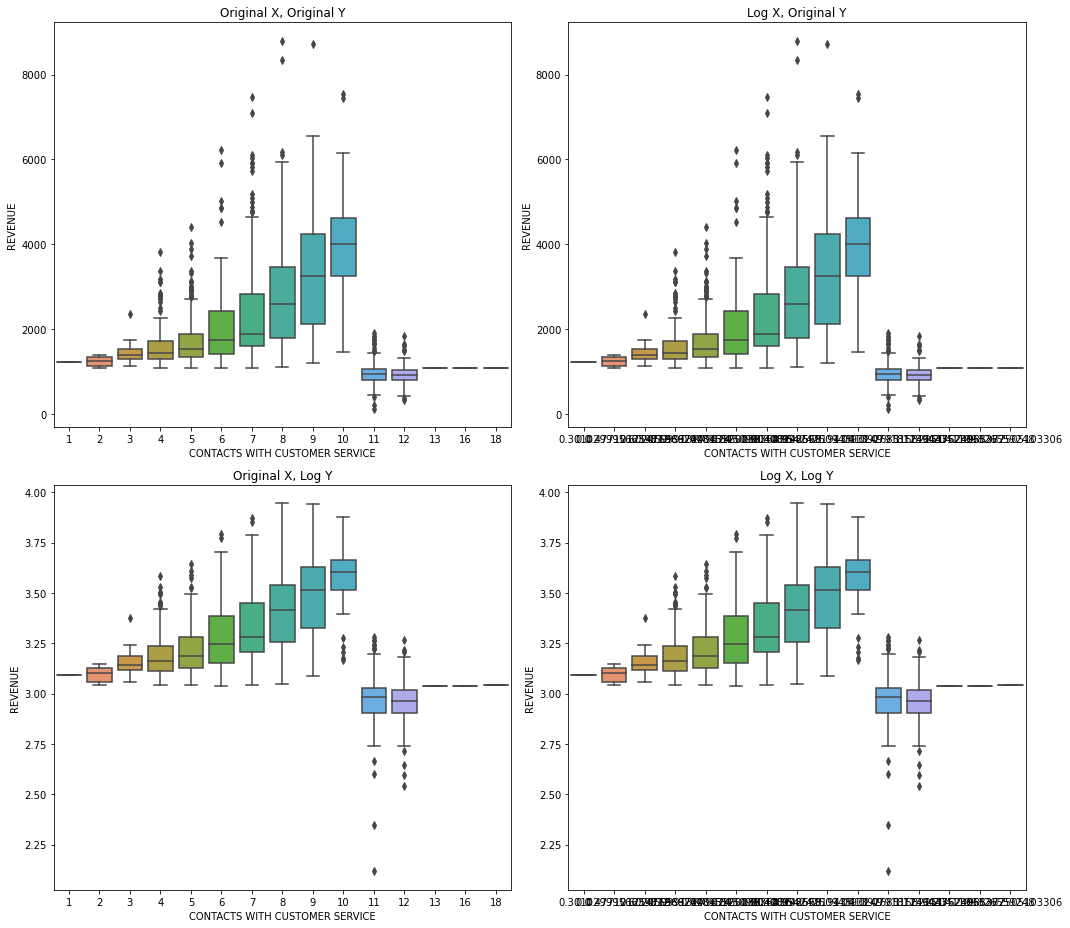

In [18]:
# developing a boxplot
## comparing log transformation results ##


apprentice['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(apprentice['CONTACTS_W_CUSTOMER_SERVICE'])
apprentice['log_REVENUE'] = np.log10(apprentice['REVENUE'])

# setting figure size
fig, ax = plt.subplots(figsize = (15, 13))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'CONTACTS_W_CUSTOMER_SERVICE',
            y     = 'REVENUE',
            data  =  apprentice)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'CONTACTS WITH CUSTOMER SERVICE')
plt.ylabel(ylabel = 'REVENUE')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_CONTACTS_W_CUSTOMER_SERVICE',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'CONTACTS WITH CUSTOMER SERVICE')
plt.ylabel(ylabel = 'REVENUE')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'CONTACTS_W_CUSTOMER_SERVICE',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'CONTACTS WITH CUSTOMER SERVICE')
plt.ylabel(ylabel = 'REVENUE')


## Plot 1: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = 'log_CONTACTS_W_CUSTOMER_SERVICE',
            y     ='log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'CONTACTS WITH CUSTOMER SERVICE')
plt.ylabel(ylabel = 'REVENUE')


## displaying the visuals ##
plt.tight_layout()
plt.show()



In [19]:
#log transformation numerical results
log_corr = apprentice.loc[ : , ['CONTACTS_W_CUSTOMER_SERVICE',
                                'log_CONTACTS_W_CUSTOMER_SERVICE',
                                'REVENUE',
                                'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['CONTACTS_W_CUSTOMER_SERVICE', 'log_CONTACTS_W_CUSTOMER_SERVICE'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
CONTACTS_W_CUSTOMER_SERVICE,0.10,-0.04
log_CONTACTS_W_CUSTOMER_SERVICE,0.17,0.05


/Users/rosabelbassil/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


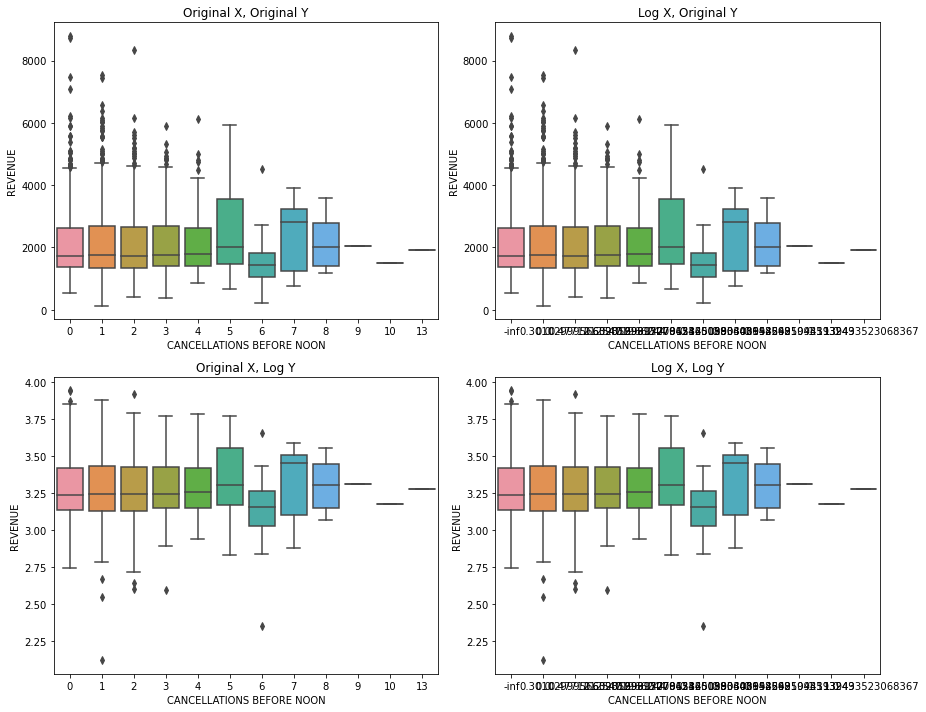

In [20]:
# developing a boxplot for CANCELLATIONS_BEFORE_NOON
## comparing log transformation results ##


apprentice['log_CANCELLATIONS_BEFORE_NOON'] = np.log10(apprentice['CANCELLATIONS_BEFORE_NOON'])
apprentice['log_REVENUE'] = np.log10(apprentice['REVENUE'])

# setting figure size
fig, ax = plt.subplots(figsize = (13, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'CANCELLATIONS_BEFORE_NOON',
            y     = 'REVENUE',
            data  =  apprentice)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'CANCELLATIONS BEFORE NOON')
plt.ylabel(ylabel = 'REVENUE')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_CANCELLATIONS_BEFORE_NOON',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'CANCELLATIONS BEFORE NOON')
plt.ylabel(ylabel = 'REVENUE')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'CANCELLATIONS_BEFORE_NOON',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'CANCELLATIONS BEFORE NOON')
plt.ylabel(ylabel = 'REVENUE')


## Plot 1: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = 'log_CANCELLATIONS_BEFORE_NOON',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'CANCELLATIONS BEFORE NOON')
plt.ylabel(ylabel = 'REVENUE')


## displaying the visuals ##
plt.tight_layout()
plt.show()


In [21]:
#log transformation numerical results

log_corr = apprentice.loc[ : , ['CANCELLATIONS_BEFORE_NOON',
                                'log_CANCELLATIONS_BEFORE_NOON',
                                'REVENUE',
                                'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['CANCELLATIONS_BEFORE_NOON', 'log_CANCELLATIONS_BEFORE_NOON'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
CANCELLATIONS_BEFORE_NOON,0.01,0.01
log_CANCELLATIONS_BEFORE_NOON,-0.01,-0.00


/Users/rosabelbassil/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


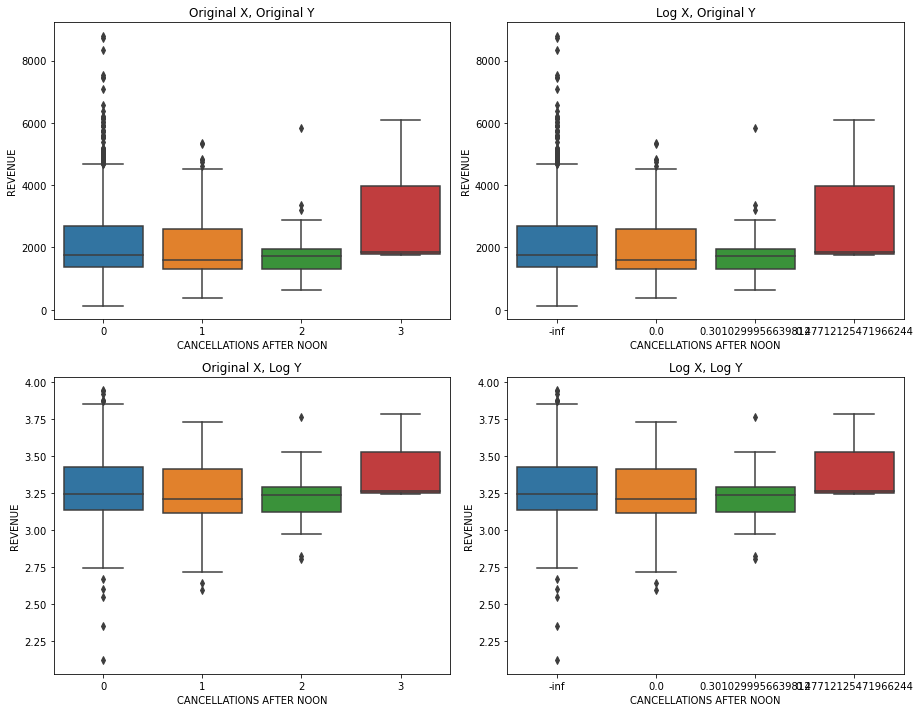

In [22]:
# developing a boxplot for CANCELLATIONS_AFTER_NOON
## comparing log transformation results ##


apprentice['log_CANCELLATIONS_AFTER_NOON'] = np.log10(apprentice['CANCELLATIONS_AFTER_NOON'])
apprentice['log_REVENUE'] = np.log10(apprentice['REVENUE'])

# setting figure size
fig, ax = plt.subplots(figsize = (13, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'CANCELLATIONS_AFTER_NOON',
            y     = 'REVENUE',
            data  =  apprentice)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'CANCELLATIONS AFTER NOON')
plt.ylabel(ylabel = 'REVENUE')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_CANCELLATIONS_AFTER_NOON',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'CANCELLATIONS AFTER NOON')
plt.ylabel(ylabel = 'REVENUE')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'CANCELLATIONS_AFTER_NOON',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'CANCELLATIONS AFTER NOON')
plt.ylabel(ylabel = 'REVENUE')


## Plot 1: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = 'log_CANCELLATIONS_AFTER_NOON',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'CANCELLATIONS AFTER NOON')
plt.ylabel(ylabel = 'REVENUE')


## displaying the visuals ##
plt.tight_layout()
plt.show()



In [23]:
#log transformation numerical results

log_corr = apprentice.loc[ : , ['CANCELLATIONS_AFTER_NOON',
                                'log_CANCELLATIONS_AFTER_NOON',
                                'REVENUE',
                                'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['CANCELLATIONS_AFTER_NOON', 'log_CANCELLATIONS_AFTER_NOON'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
CANCELLATIONS_AFTER_NOON,-0.04,-0.04
log_CANCELLATIONS_AFTER_NOON,0.00,0.00


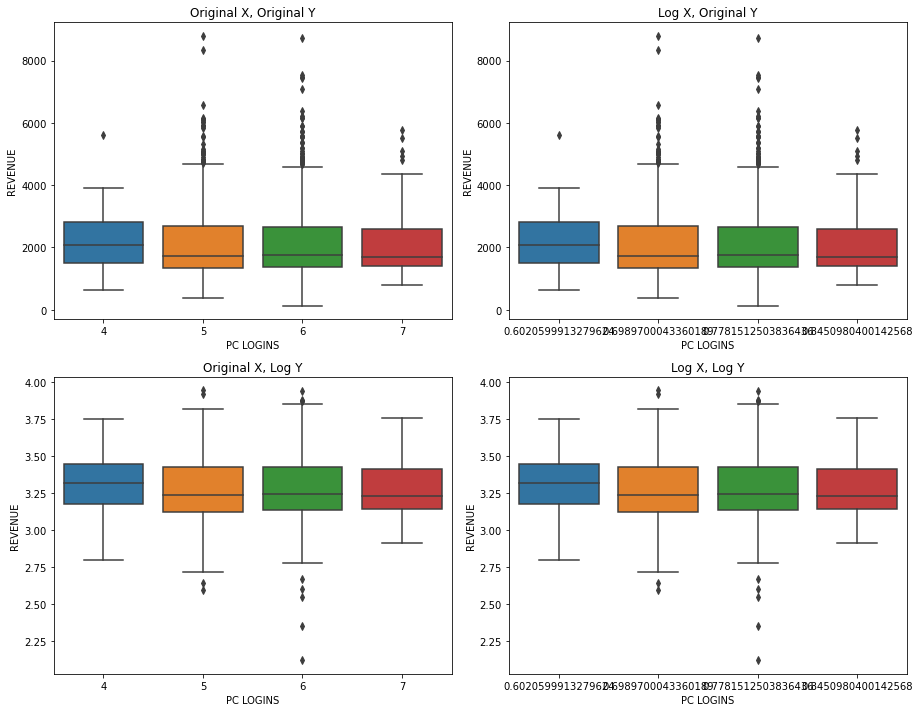

In [24]:
# developing a boxplot for PC_LOGINS
## comparing log transformation results ##


apprentice['log_PC_LOGINS'] = np.log10(apprentice['PC_LOGINS'])
apprentice['log_REVENUE'] = np.log10(apprentice['REVENUE'])

# setting figure size
fig, ax = plt.subplots(figsize = (13, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'PC_LOGINS',
            y     = 'REVENUE',
            data  =  apprentice)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'PC LOGINS')
plt.ylabel(ylabel = 'REVENUE')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_PC_LOGINS',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'PC LOGINS')
plt.ylabel(ylabel = 'REVENUE')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'PC_LOGINS',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'PC LOGINS')
plt.ylabel(ylabel = 'REVENUE')


## Plot 1: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = 'log_PC_LOGINS',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'PC LOGINS')
plt.ylabel(ylabel = 'REVENUE')


## displaying the visuals ##
plt.tight_layout()
plt.show()


In [25]:
#log transformation numerical results

log_corr = apprentice.loc[ : , ['PC_LOGINS',
                                'log_PC_LOGINS',
                                'REVENUE',
                                'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['PC_LOGINS', 'log_PC_LOGINS'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
PC_LOGINS,0.02,0.01
log_PC_LOGINS,0.01,0.01


/Users/rosabelbassil/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


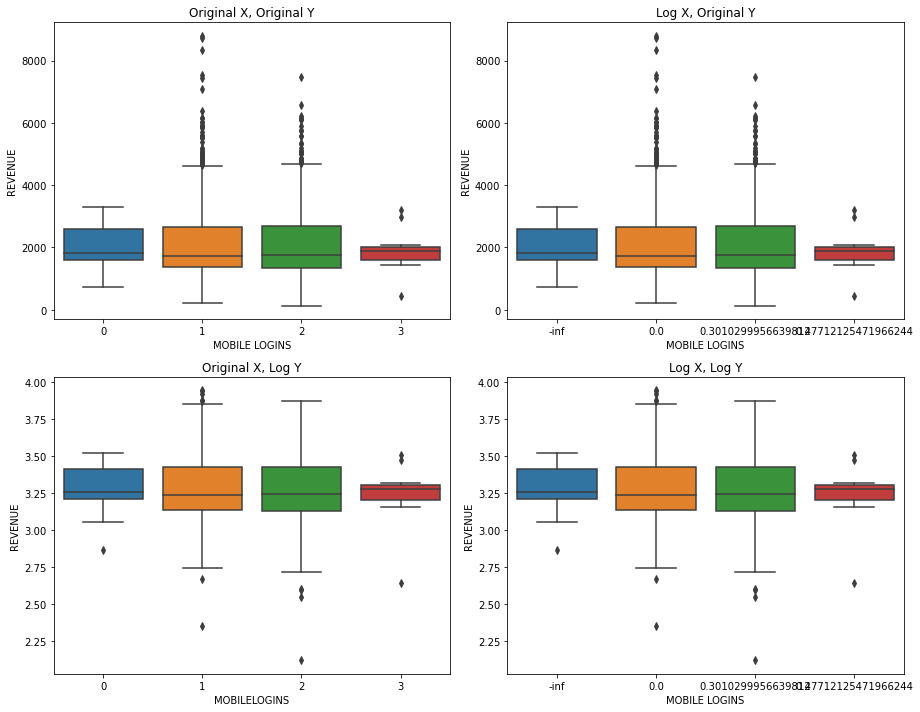

In [26]:
# developing a boxplot for MOBILE_LOGINS
## comparing log transformation results ##


apprentice['log_MOBILE_LOGINS'] = np.log10(apprentice['MOBILE_LOGINS'])
apprentice['log_REVENUE'] = np.log10(apprentice['REVENUE'])

# setting figure size
fig, ax = plt.subplots(figsize = (13, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'MOBILE_LOGINS',
            y     = 'REVENUE',
            data  =  apprentice)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'MOBILE LOGINS')
plt.ylabel(ylabel = 'REVENUE')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_MOBILE_LOGINS',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'MOBILE LOGINS')
plt.ylabel(ylabel = 'REVENUE')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'MOBILE_LOGINS',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'MOBILELOGINS')
plt.ylabel(ylabel = 'REVENUE')


## Plot 1: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = 'log_MOBILE_LOGINS',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'MOBILE LOGINS')
plt.ylabel(ylabel = 'REVENUE')


## displaying the visuals ##
plt.tight_layout()
plt.show()


In [27]:
#log transformation numerical results

log_corr = apprentice.loc[ : , ['MOBILE_LOGINS',
                                'log_MOBILE_LOGINS',
                                'REVENUE',
                                'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['MOBILE_LOGINS', 'log_MOBILE_LOGINS'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
MOBILE_LOGINS,-0.02,-0.01
log_MOBILE_LOGINS,-0.02,-0.01


/Users/rosabelbassil/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


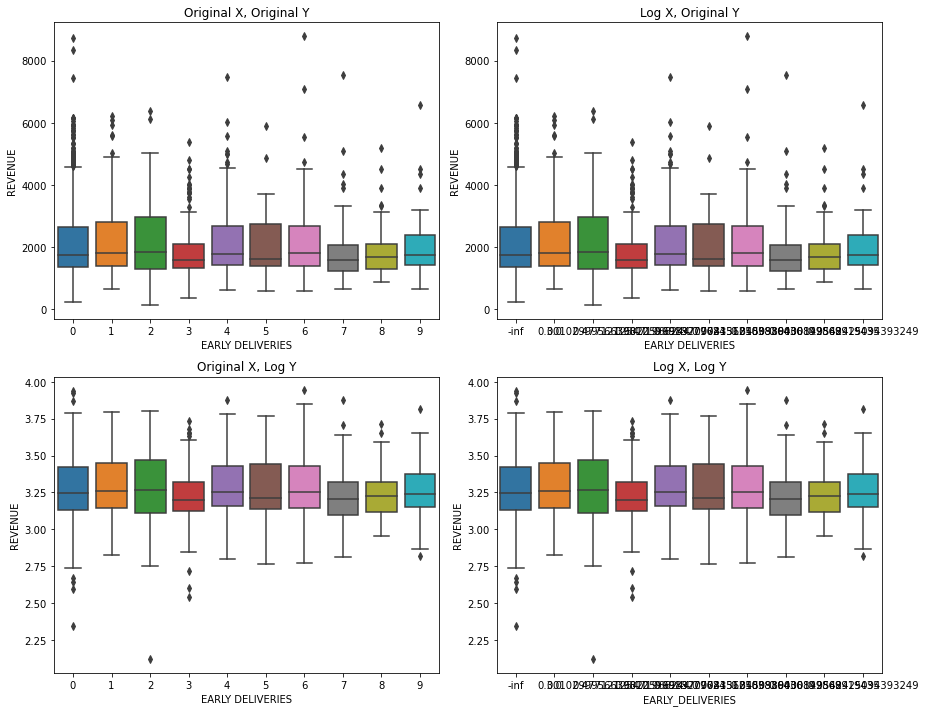

In [28]:
# developing a boxplot for EARLY_DELIVERIES
## comparing log transformation results ##


apprentice['log_EARLY_DELIVERIES'] = np.log10(apprentice['EARLY_DELIVERIES'])
apprentice['log_REVENUE'] = np.log10(apprentice['REVENUE'])

# setting figure size
fig, ax = plt.subplots(figsize = (13, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'EARLY_DELIVERIES',
            y     = 'REVENUE',
            data  =  apprentice)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'EARLY DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_EARLY_DELIVERIES',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'EARLY DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'EARLY_DELIVERIES',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'EARLY DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


## Plot 1: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = 'log_EARLY_DELIVERIES',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'EARLY_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


## displaying the visuals ##
plt.tight_layout()
plt.show()


In [29]:
#log transformation numerical results

log_corr = apprentice.loc[ : , ['EARLY_DELIVERIES',
                                'log_EARLY_DELIVERIES',
                                'REVENUE',
                                'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['EARLY_DELIVERIES', 'log_EARLY_DELIVERIES'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
EARLY_DELIVERIES,-0.00,-0.01
log_EARLY_DELIVERIES,-0.04,-0.04


/Users/rosabelbassil/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


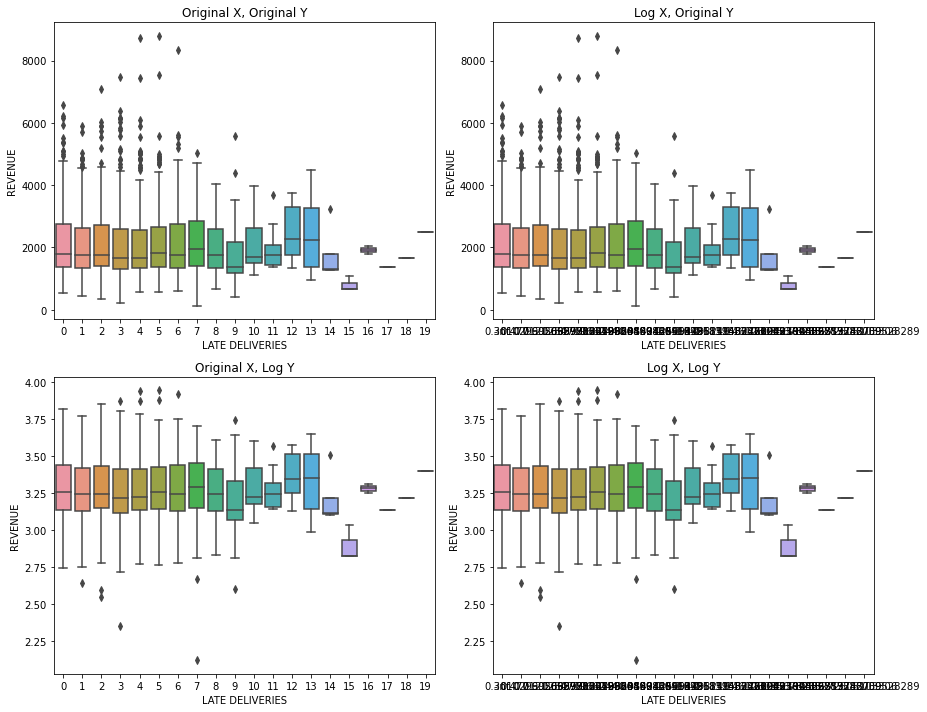

In [30]:
# developing a boxplot for LATE_DELIVERIES
## comparing log transformation results ##


apprentice['log_LATE_DELIVERIES'] = np.log10(apprentice['LATE_DELIVERIES'])
apprentice['log_REVENUE'] = np.log10(apprentice['REVENUE'])

# setting figure size
fig, ax = plt.subplots(figsize = (13, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'LATE_DELIVERIES',
            y     = 'REVENUE',
            data  =  apprentice)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'LATE DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_LATE_DELIVERIES',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'LATE DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'LATE_DELIVERIES',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'LATE DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


## Plot 1: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = 'log_LATE_DELIVERIES',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'LATE DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


## displaying the visuals ##
plt.tight_layout()
plt.show()


In [31]:
#log transformation numerical results

log_corr = apprentice.loc[ : , ['LATE_DELIVERIES',
                                'log_LATE_DELIVERIES',
                                'REVENUE',
                                'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['LATE_DELIVERIES', 'log_LATE_DELIVERIES'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
LATE_DELIVERIES,-0.01,-0.02
log_LATE_DELIVERIES,0.02,-0.00


/Users/rosabelbassil/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


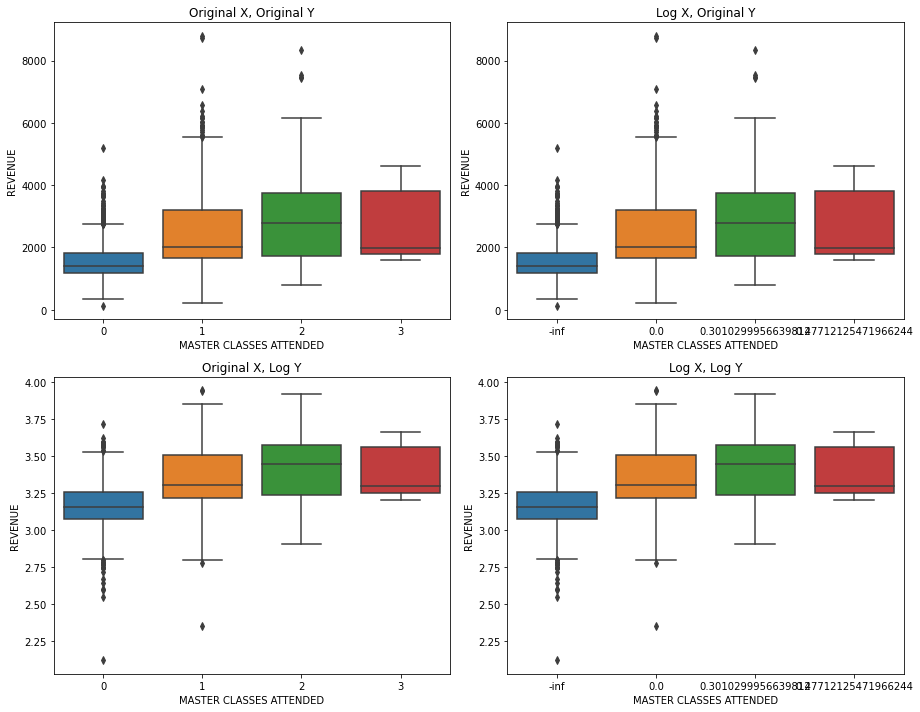

In [32]:
# developing a boxplot for MASTER_CLASSES_ATTENDED
## comparing log transformation results ##


apprentice['log_MASTER_CLASSES_ATTENDED'] = np.log10(apprentice['MASTER_CLASSES_ATTENDED'])
apprentice['log_REVENUE'] = np.log10(apprentice['REVENUE'])

# setting figure size
fig, ax = plt.subplots(figsize = (13, 10))


## Plot 1: Original X, Original Y ##
plt.subplot(2, 2, 1)

sns.boxplot(x     = 'MASTER_CLASSES_ATTENDED',
            y     = 'REVENUE',
            data  =  apprentice)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'MASTER CLASSES ATTENDED')
plt.ylabel(ylabel = 'REVENUE')



## Plot 2: Log X, Original Y ##
plt.subplot(2, 2, 2)
sns.boxplot(x     = 'log_MASTER_CLASSES_ATTENDED',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Original Y')
plt.xlabel(xlabel = 'MASTER CLASSES ATTENDED')
plt.ylabel(ylabel = 'REVENUE')


## Plot 3: Original X, Log Y ##
plt.subplot(2, 2, 3)
sns.boxplot(x     = 'MASTER_CLASSES_ATTENDED',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'MASTER CLASSES ATTENDED')
plt.ylabel(ylabel = 'REVENUE')


## Plot 1: Log X, Log Y ##
plt.subplot(2, 2, 4)
sns.boxplot(x     = 'log_MASTER_CLASSES_ATTENDED',
            y     = 'log_REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Log X, Log Y')
plt.xlabel(xlabel = 'MASTER CLASSES ATTENDED')
plt.ylabel(ylabel = 'REVENUE')


## displaying the visuals ##
plt.tight_layout()
plt.show()


In [33]:
#log transformation numerical results

log_corr = apprentice.loc[ : , ['MASTER_CLASSES_ATTENDED',
                                'log_MASTER_CLASSES_ATTENDED',
                                'REVENUE',
                                'log_REVENUE']  ].corr(method = 'pearson')\
                                                 .round(decimals = 2)



log_corr.loc[ ['MASTER_CLASSES_ATTENDED', 'log_MASTER_CLASSES_ATTENDED'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
MASTER_CLASSES_ATTENDED,0.45,0.47
log_MASTER_CLASSES_ATTENDED,0.12,0.11


Check the value counts for the following variables after analyzing the boxplots

In [34]:
# counting the number of zeroes
MASTER_CLASSES_ZEROES            = len(apprentice['MASTER_CLASSES_ATTENDED'][apprentice['MASTER_CLASSES_ATTENDED'] == 0])
LATE_DELIVERIES_ZEROES           = len(apprentice['LATE_DELIVERIES'][apprentice['LATE_DELIVERIES'] == 0])
EARLY_DELIVERIES_ZEROES          = len(apprentice['EARLY_DELIVERIES'][apprentice['EARLY_DELIVERIES'] == 0])
CANCELLATIONS_BEFORE_NOON_ZEROES = len(apprentice['CANCELLATIONS_BEFORE_NOON'][apprentice['CANCELLATIONS_BEFORE_NOON'] == 0])
CANCELLATIONS_AFTER_NOON_ZEROES  = len(apprentice['CANCELLATIONS_AFTER_NOON'][apprentice['CANCELLATIONS_AFTER_NOON'] == 0])
MOBILE_LOGINS_ZEROES             = len(apprentice['MOBILE_LOGINS'][apprentice['MOBILE_LOGINS'] == 0])             

## the table below has been coded for you ##

# printing a table of the results
print(f"""
                            No\t\tYes
                 --------------------------------
MASTER_CLASSES_ATTENDED  | {MASTER_CLASSES_ZEROES}\t\t{len(apprentice) - MASTER_CLASSES_ZEROES}
LATE_DELIVERIES          | {LATE_DELIVERIES_ZEROES}\t\t{len(apprentice) - LATE_DELIVERIES_ZEROES}
EARLY_DELIVERIES         | {EARLY_DELIVERIES_ZEROES }\t\t{len(apprentice) - EARLY_DELIVERIES_ZEROES}
CANCELLATIONS_BEFORE_NOON| {CANCELLATIONS_BEFORE_NOON_ZEROES}\t\t{len(apprentice) - CANCELLATIONS_BEFORE_NOON_ZEROES}
CANCELLATIONS_AFTER_NOON | {CANCELLATIONS_AFTER_NOON_ZEROES}\t\t{len(apprentice) - CANCELLATIONS_AFTER_NOON_ZEROES}
MOBILE_LOGINS            | {MOBILE_LOGINS_ZEROES  }\t\t{len(apprentice) - MOBILE_LOGINS_ZEROES}
""")




                            No		Yes
                 --------------------------------
MASTER_CLASSES_ATTENDED  | 932		1014
LATE_DELIVERIES          | 319		1627
EARLY_DELIVERIES         | 1167		779
CANCELLATIONS_BEFORE_NOON| 667		1279
CANCELLATIONS_AFTER_NOON | 1667		279
MOBILE_LOGINS            | 16		1930



Since' MOBILE_LOGINS' has only 16 observations in the 'No' columns versus 1930 in the 'Yes' column, we won't be getting dummy varabeles for it

In [35]:
# dummy variable for MASTER_CLASSES_ATTENDED,LATE_DELIVERIES,EARLY_DELIVERIES,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON

apprentice['has_MASTER_CLASSES_ATTENDED']   = 0
apprentice['has_LATE_DELIVERIES']           = 0
apprentice['has_CANCELLATIONS_BEFORE_NOON'] = 0
apprentice['has_CANCELLATIONS_AFTER_NOON']  = 0
    
    
for index, value in apprentice.iterrows():
    
    # MASTER_CLASSES_ATTENDED
    if apprentice.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        apprentice.loc[index,'has_MASTER_CLASSES_ATTENDED'] = 1
   
    # LATE_DELIVERIES
    if apprentice.loc[index, 'LATE_DELIVERIES'] > 0:
        apprentice.loc[index,'has_LATE_DELIVERIES'] = 1
        
    # CANCELLATIONS_BEFORE_NOON
    if apprentice.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        apprentice.loc[index,'has_CANCELLATIONS_BEFORE_NOON'] = 1
   
    # CANCELLATIONS_AFTER_NOON
    if apprentice.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        apprentice.loc[index,'has_CANCELLATIONS_AFTER_NOON'] = 1
         
        

In [36]:
# checking results
apprentice[['has_MASTER_CLASSES_ATTENDED', 'has_LATE_DELIVERIES', 
         'has_CANCELLATIONS_BEFORE_NOON', 'has_CANCELLATIONS_AFTER_NOON']].head()

,has_MASTER_CLASSES_ATTENDED,has_LATE_DELIVERIES,has_CANCELLATIONS_BEFORE_NOON,has_CANCELLATIONS_AFTER_NOON
0,0,1,1,1
1,0,1,0,0
2,0,1,1,0
3,0,1,1,0
4,1,1,0,0


In [37]:
#Code below is to remove the infinity and replace it by zero 
for col in apprentice.columns:
      apprentice[col] = apprentice[col].replace(np.NINF, 0)

<B> COMBINIG FEATURES:

Relationship between CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON and REVENUE

In [38]:

# printing value counts for CANCELLATIONS_BEFORE_NOON and CANCELLATIONS_AFTER_NOON
print(f"""

Count of Cancellations
==================

----------
CANCELLATIONS_BEFORE_NOON
----------
{apprentice['CANCELLATIONS_BEFORE_NOON'].value_counts(normalize = False).sort_index()}


----------
CANCELLATIONS_AFTER_NOON
----------
{apprentice['CANCELLATIONS_AFTER_NOON'].value_counts(normalize = False).sort_index()}


""")



Count of Cancellations

----------
CANCELLATIONS_BEFORE_NOON
----------
0     667
1     567
2     331
3     189
4     105
5      43
6      23
7      11
8       7
9       1
10      1
13      1
Name: CANCELLATIONS_BEFORE_NOON, dtype: int64


----------
CANCELLATIONS_AFTER_NOON
----------
0    1667
1     238
2      38
3       3
Name: CANCELLATIONS_AFTER_NOON, dtype: int64





TOTAL_CANCELLATIONS = CANCELLATIONS_BEFORE_NOON + CANCELLATIONS_AFTER_NOON

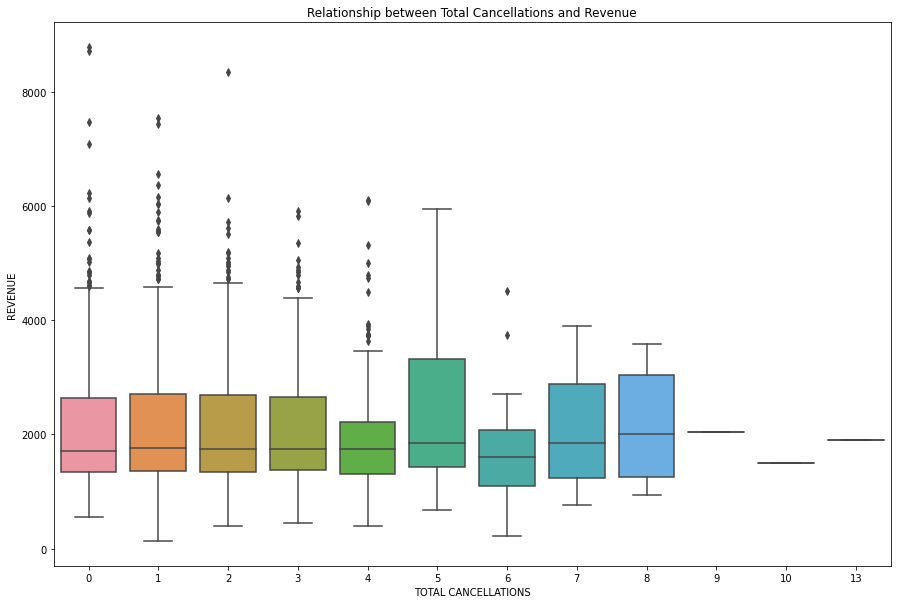


CANCELLATIONS

-----------
TOTAL CANCELLATIONS
-----------
0     572
1     583
2     336
3     224
4     121
5      58
6      28
7      12
8       9
9       1
10      1
13      1
Name: TOTAL_CANCELLATIONS, dtype: int64


---------------------
CANCELLATIONS CORRELATIONS
---------------------
TOTAL_CANCELLATIONS          0.00
CANCELLATIONS_BEFORE_NOON    0.01
CANCELLATIONS_AFTER_NOON    -0.04
REVENUE                      1.00
Name: REVENUE, dtype: float64




In [39]:
# total cancellations
apprentice['TOTAL_CANCELLATIONS'] = (apprentice['CANCELLATIONS_BEFORE_NOON']) +(apprentice['CANCELLATIONS_AFTER_NOON'])


# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'TOTAL_CANCELLATIONS',
            y    = 'REVENUE',
            data = apprentice)



# titles and labels
plt.title(label   = 'Relationship between Total Cancellations and Revenue')
plt.xlabel(xlabel = 'TOTAL CANCELLATIONS')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout
plt.show()


# developing a correlation matrix
canc_corr = apprentice.loc[ : ,['TOTAL_CANCELLATIONS',
                              'CANCELLATIONS_BEFORE_NOON',
                              'CANCELLATIONS_AFTER_NOON',
                              'REVENUE']  ].corr(method = 'pearson')\
                                             .round(decimals = 2)


# printing value counts and correlations bathrooms
print(f"""
CANCELLATIONS
=========

-----------
TOTAL CANCELLATIONS
-----------
{apprentice['TOTAL_CANCELLATIONS'].value_counts(normalize = False).sort_index()}


---------------------
CANCELLATIONS CORRELATIONS
---------------------
{canc_corr['REVENUE']}

""")

Relationship between MOBILE_LOGINS,PC_LOGINS and REVENUE

In [40]:

# printing value counts for mobile_logins and pc_logins
print(f"""

Count of Logins
==================

----------
MOBILE LOGINS
----------
{apprentice['MOBILE_LOGINS'].value_counts(normalize = False).sort_index()}


----------
PC LOGINS
----------
{apprentice['PC_LOGINS'].value_counts(normalize = False).sort_index()}


""")



Count of Logins

----------
MOBILE LOGINS
----------
0     16
1    999
2    919
3     12
Name: MOBILE_LOGINS, dtype: int64


----------
PC LOGINS
----------
4     41
5    904
6    957
7     44
Name: PC_LOGINS, dtype: int64





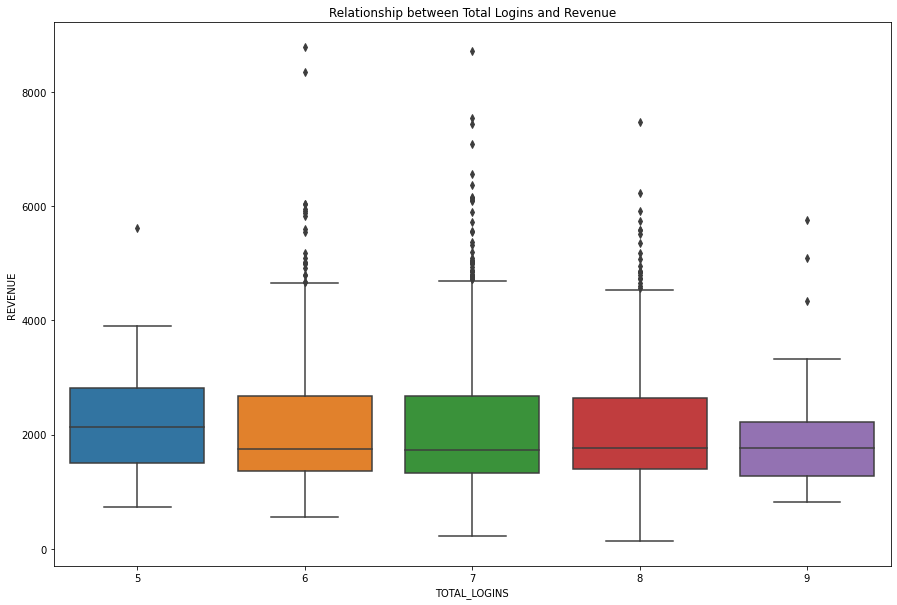


LOGINS

-----------
TOTAL LOGINS
-----------
5     31
6    493
7    906
8    492
9     24
Name: TOTAL_LOGINS, dtype: int64


---------------------
LOGINS CORRELATIONS
---------------------
TOTAL_LOGINS    -0.00
MOBILE_LOGINS   -0.02
PC_LOGINS        0.02
REVENUE          1.00
Name: REVENUE, dtype: float64




In [41]:
# total logins
apprentice['TOTAL_LOGINS'] = (apprentice['MOBILE_LOGINS']) +(apprentice['PC_LOGINS'])


# setting figure size
fig, ax = plt.subplots(figsize = (15, 10))


# developing a boxplot
sns.boxplot(x    = 'TOTAL_LOGINS',
            y    = 'REVENUE',
            data = apprentice)



# titles and labels
plt.title(label   = 'Relationship between Total Logins and Revenue')
plt.xlabel(xlabel = 'TOTAL_LOGINS')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.tight_layout
plt.show()


# developing a correlation matrix
log_corr = apprentice.loc[ : ,['TOTAL_LOGINS',
                              'MOBILE_LOGINS',
                              'PC_LOGINS',
                              'REVENUE']  ].corr(method = 'pearson')\
                                             .round(decimals = 2)


# printing value counts and correlations bathrooms
print(f"""
LOGINS
=========

-----------
TOTAL LOGINS
-----------
{apprentice['TOTAL_LOGINS'].value_counts(normalize = False).sort_index()}


---------------------
LOGINS CORRELATIONS
---------------------
{log_corr['REVENUE']}

""")

# Feature Engineering - Encoding Categorical Data

In [42]:
#see the value counts for each variable that was assumed categorical.

# printing columns
print(f"""
CROSS SELL SUCCESS
------
{apprentice['CROSS_SELL_SUCCESS'].value_counts()}


TASTES AND PREFERNCES
----------
{apprentice['TASTES_AND_PREFERENCES'].value_counts()}


PACKAGE LOCKER
-------------
{apprentice['PACKAGE_LOCKER'].value_counts()}


REFRIGERATED LOCKER
----------
{apprentice['REFRIGERATED_LOCKER'].value_counts()}


MOBILE NUMBER
-------------
{apprentice['MOBILE_NUMBER'].value_counts()}


MEDIAN MEAL RATING
-------------
{apprentice['MEDIAN_MEAL_RATING'].value_counts()}


UNIQUE MEALS PURCHASED
-------------
{apprentice['UNIQUE_MEALS_PURCH'].value_counts()}


PRODUCT CATEGORIES VIEWED
-------------
{apprentice['PRODUCT_CATEGORIES_VIEWED'].value_counts()}

 """)


CROSS SELL SUCCESS
------
1    1321
0     625
Name: CROSS_SELL_SUCCESS, dtype: int64


TASTES AND PREFERNCES
----------
1    1390
0     556
Name: TASTES_AND_PREFERENCES, dtype: int64


PACKAGE LOCKER
-------------
0    1255
1     691
Name: PACKAGE_LOCKER, dtype: int64


REFRIGERATED LOCKER
----------
0    1726
1     220
Name: REFRIGERATED_LOCKER, dtype: int64


MOBILE NUMBER
-------------
1    1708
0     238
Name: MOBILE_NUMBER, dtype: int64


MEDIAN MEAL RATING
-------------
3    1087
2     487
4     260
1      99
5      13
Name: MEDIAN_MEAL_RATING, dtype: int64


UNIQUE MEALS PURCHASED
-------------
3     338
4     260
6     226
5     214
7     205
8     179
1     173
2     170
9     162
10      7
12      4
13      3
11      3
19      1
18      1
Name: UNIQUE_MEALS_PURCH, dtype: int64


PRODUCT CATEGORIES VIEWED
-------------
2     313
10    287
3     253
7     170
8     166
1     162
5     156
6     153
4     146
9     140
Name: PRODUCT_CATEGORIES_VIEWED, dtype: int64

 


In [43]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    
    """
    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    fig, ax = plt.subplots(figsize = (10, 8))
    
    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)
    
    plt.suptitle("")
    plt.show()

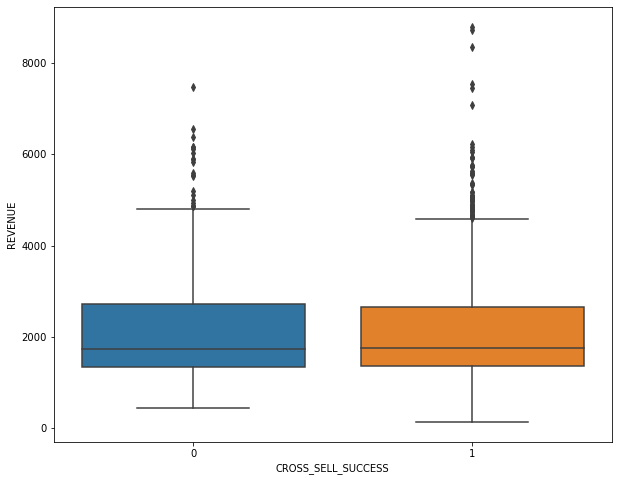

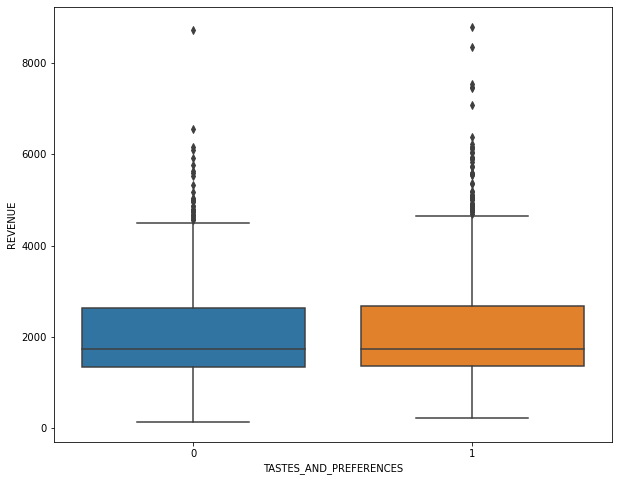

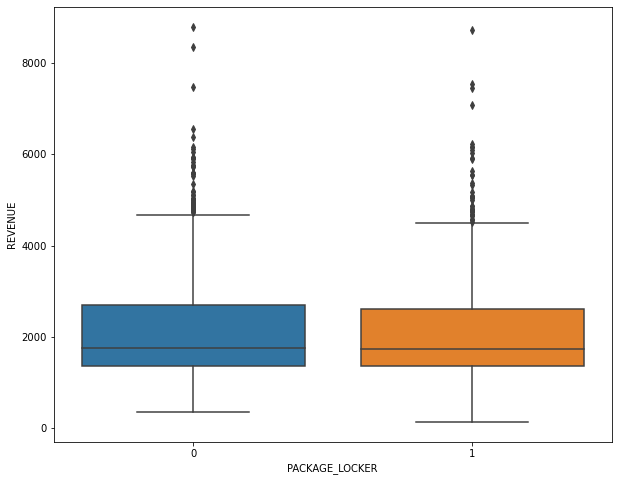

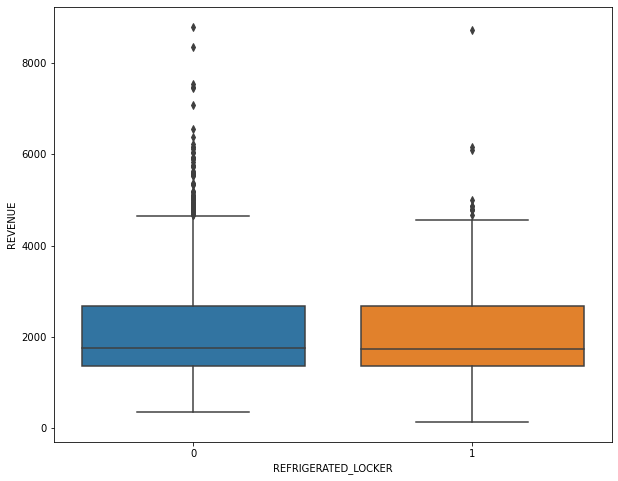

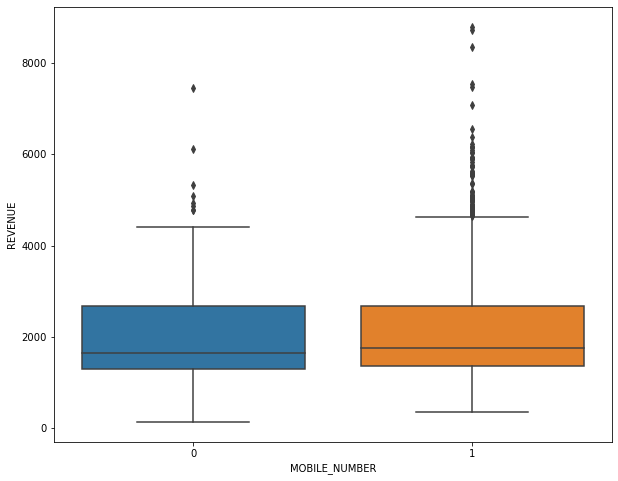

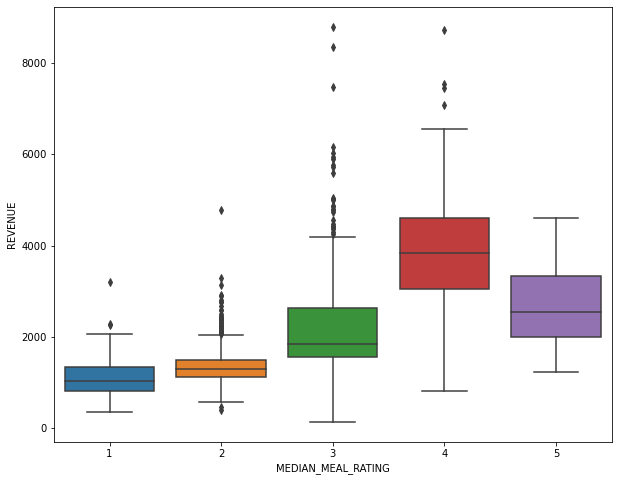

In [44]:
# calling the function for CROSS_SELL_SUCCESS
categorical_boxplots(response = 'CROSS_SELL_SUCCESS',
					 cat_var  = 'REVENUE',
					 data     = apprentice)


# calling the function for TASTES_AND_PREFERENCE
categorical_boxplots(response = 'TASTES_AND_PREFERENCES',
					 cat_var  = 'REVENUE',
					 data     = apprentice)


# calling the function for PACKAGE_LOCKER
categorical_boxplots(response = 'PACKAGE_LOCKER',
					 cat_var  = 'REVENUE',
					 data     = apprentice)


# calling the function for REFRIGERATED_LOCKER
categorical_boxplots(response = 'REFRIGERATED_LOCKER',
					 cat_var  = 'REVENUE',
					 data     = apprentice)

# calling the function for MOBILE_NUMBER
categorical_boxplots(response = 'MOBILE_NUMBER',
					 cat_var  = 'REVENUE',
					 data     = apprentice)

# calling the function for MEDIAN_MEAL_RATING
categorical_boxplots(response = 'MEDIAN_MEAL_RATING',
					 cat_var  = 'REVENUE',
					 data     = apprentice)


In [45]:
# one hot encoding categorical variables to get dummies for median rating,unique meals purchased,product categories viewed

ONE_HOT_MEAL_RATING  = pd.get_dummies(apprentice['MEDIAN_MEAL_RATING'],
                                      prefix='MEDIAN_MEAL_RATING')
ONE_HOT_UNIQUE_MEALS_PURCH  = pd.get_dummies(apprentice['UNIQUE_MEALS_PURCH'],
                                      prefix='UNIQUE_MEALS_PURCH')
ONE_HOT_PRODUCT_CATEGORIES_VIEWED  = pd.get_dummies(apprentice['PRODUCT_CATEGORIES_VIEWED'],
                                      prefix='PRODUCT_CATEGORIES_VIEWED')


# dropping categorical variables after they've been encoded
apprentice = apprentice.drop('MEDIAN_MEAL_RATING', axis = 1)
apprentice = apprentice.drop('UNIQUE_MEALS_PURCH', axis = 1)
apprentice = apprentice.drop('PRODUCT_CATEGORIES_VIEWED', axis = 1)

# joining codings together
apprentice = apprentice.join([ONE_HOT_MEAL_RATING])
apprentice = apprentice.join([ONE_HOT_UNIQUE_MEALS_PURCH])
apprentice = apprentice.join([ONE_HOT_PRODUCT_CATEGORIES_VIEWED])

# Analyzing Pearson correlations with the Y-variable

In [46]:
# creating a (Pearson) correlation matrix
df_corr = apprentice.corr().round(2)


# printing (Pearson) correlations with SalePrice
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                            1.00
log_REVENUE                        0.95
AVG_PREP_VID_TIME                  0.64
TOTAL_MEALS_ORDERED                0.60
MEDIAN_MEAL_RATING_4               0.59
TOTAL_PHOTOS_VIEWED                0.47
has_MASTER_CLASSES_ATTENDED        0.45
MASTER_CLASSES_ATTENDED            0.45
AVG_MEALS_ORDERED                  0.44
has_TOTAL_PHOTOS_VIEWED            0.37
log_MASTER_CLASSES_ATTENDED        0.22
UNIQUE_MEALS_PURCH_1               0.21
log_CONTACTS_W_CUSTOMER_SERVICE    0.17
AVG_TIME_PER_SITE_VISIT            0.14
UNIQUE_MEALS_PURCH_10              0.11
CONTACTS_W_CUSTOMER_SERVICE        0.10
UNIQUE_MEALS_PURCH_18              0.08
UNIQUE_MEALS_PURCH_11              0.07
PRODUCT_CATEGORIES_VIEWED_6        0.06
UNIQUE_MEALS_PURCH_12              0.06
UNIQUE_MEALS_PURCH_19              0.06
PRODUCT_CATEGORIES_VIEWED_2        0.06
PRODUCT_CATEGORIES_VIEWED_9        0.06
PRODUCT_CATEGORIES_VIEWED_10       0.05
UNIQUE_MEALS_PURCH_13              0.04


# Building a full model

In [47]:
# making a copy of apprentice
apprentice_explanatory = apprentice.copy()


# dropping Y_variables from the explanatory variable set
apprentice_explanatory = apprentice_explanatory.drop(['REVENUE',
                                                    'log_REVENUE'], axis = 1)
                                                


# formatting each explanatory variable for statsmodels
for val in apprentice_explanatory:
    print(f"{val} +")

CROSS_SELL_SUCCESS +
NAME +
EMAIL +
FIRST_NAME +
FAMILY_NAME +
TOTAL_MEALS_ORDERED +
CONTACTS_W_CUSTOMER_SERVICE +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
AVG_MEALS_ORDERED +
MASTER_CLASSES_ATTENDED +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
m_FAMILY_NAME +
has_WEEKLY_PLAN +
has_TOTAL_PHOTOS_VIEWED +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_CANCELLATIONS_BEFORE_NOON +
log_CANCELLATIONS_AFTER_NOON +
log_PC_LOGINS +
log_MOBILE_LOGINS +
log_EARLY_DELIVERIES +
log_LATE_DELIVERIES +
log_MASTER_CLASSES_ATTENDED +
has_MASTER_CLASSES_ATTENDED +
has_LATE_DELIVERIES +
has_CANCELLATIONS_BEFORE_NOON +
has_CANCELLATIONS_AFTER_NOON +
TOTAL_CANCELLATIONS +
TOTAL_LOGINS +
MEDIAN_MEAL_RATING_1 +
MEDIAN_MEAL_RATING_2 +
MEDIAN_MEAL_RATING_3 +
MEDIAN_MEAL_RATING_4 +
MEDIAN_MEAL_RATING_5 +

In [48]:
# saving feature-rich dataset in Excel
apprentice.to_excel('./apprentice_feature_rich.xlsx',
                 index = False)

In [49]:
# importing package, statsmodels as smf 
import statsmodels.formula.api as smf # predictive modeling 

<B> Removing redundant variables and those with p_values >0.05 


In [50]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = 

"""REVENUE~ 

TOTAL_MEALS_ORDERED +
AVG_PREP_VID_TIME +
AVG_MEALS_ORDERED +
MASTER_CLASSES_ATTENDED +
TOTAL_PHOTOS_VIEWED +
log_CONTACTS_W_CUSTOMER_SERVICE +
MEDIAN_MEAL_RATING_4 +
UNIQUE_MEALS_PURCH_1+
UNIQUE_MEALS_PURCH_2+
UNIQUE_MEALS_PURCH_3+
UNIQUE_MEALS_PURCH_7+
UNIQUE_MEALS_PURCH_8+
UNIQUE_MEALS_PURCH_10+
PRODUCT_CATEGORIES_VIEWED_1 +
PRODUCT_CATEGORIES_VIEWED_3 +
PRODUCT_CATEGORIES_VIEWED_4 +
PRODUCT_CATEGORIES_VIEWED_5 +
PRODUCT_CATEGORIES_VIEWED_9 +
PRODUCT_CATEGORIES_VIEWED_10 

""",
                               
data = apprentice)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REVENUE   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     286.1
Date:                Tue, 09 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:31:24   Log-Likelihood:                -15151.
No. Observations:                1946   AIC:                         3.034e+04
Df Residuals:                    1926   BIC:                         3.045e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -37.3736     93.046     -0.402      0.688    -219.854     145.107
TOTAL_MEALS_ORDERED                 5.6377      0.300     18.770      0.000       5.049       6.227
AVG_PREP_VID_TIME                  10.3026      0.527     19.566      0.000       9.270      11.335
AVG_MEALS_ORDERED                -121.3454     14.632     -8.293      0.000    -150.043     -92.648
MASTER_CLASSES_ATTENDED           199.8332     24.068      8.303      0.000     152.632     247.035
TOTAL_PHOTOS_VIEWED                 0.4919      0.086      5.743      0.000       0.324       0.660
log_CONTACTS_W_CUSTOMER_SERVICE   345.9281     94.046      3.678      0.000     161.485     530.371
MEDIAN_MEAL_RATING_4             1036.1184     47.106     21.995      0.000     943.733    1128.503
UNIQUE_MEALS_PURCH_1             1280.7665     49.429     25.911      0.000    1183.827    1377.706
UNIQUE_MEALS_PURCH_2               34.6567     49.476      0.700      0.484     -62.376     131.689
UNIQUE_MEALS_PURCH_3              -16.1373     37.623     -0.429      0.668     -89.923      57.649
UNIQUE_MEALS_PURCH_7               44.3924     45.603      0.973      0.330     -45.043     133.828
UNIQUE_MEALS_PURCH_8               52.0192     48.493      1.073      0.284     -43.085     147.123
UNIQUE_MEALS_PURCH_10             350.9719    225.783      1.554      0.120     -91.832     793.776
PRODUCT_CATEGORIES_VIEWED_1        97.8527     50.483      1.938      0.053      -1.154     196.860
PRODUCT_CATEGORIES_VIEWED_3      -160.1080     42.528     -3.765      0.000    -243.513     -76.703
PRODUCT_CATEGORIES_VIEWED_4      -180.6459     52.967     -3.411      0.001    -284.524     -76.768
PRODUCT_CATEGORIES_VIEWED_5        68.6297     51.430      1.334      0.182     -32.236     169.495
PRODUCT_CATEGORIES_VIEWED_9        72.2567     53.958      1.339      0.181     -33.566     178.080
PRODUCT_CATEGORIES_VIEWED_10       44.8393     40.436      1.109      0.268     -34.463     124.141
==============================================================================
Omnibus:                      586.077   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8908.532
Skew:                           0.993   Prob(JB):                         0.00
Kurtosis:                      13.292   Cond. No.                     4.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


<B> Modeling Strategy for CONTINUOUS Response Variable


<B> Training and Testing Sets



In [51]:
# importing libraries
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression


# specifying the path and file name
file = './apprentice_feature_rich.xlsx'


# reading the file into Python
apprentice = pd.read_excel(file)


# checking the file
apprentice.head(n = 5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,CONTACTS_W_CUSTOMER_SERVICE,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVG_MEALS_ORDERED,MASTER_CLASSES_ATTENDED,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME,has_WEEKLY_PLAN,has_TOTAL_PHOTOS_VIEWED,log_CONTACTS_W_CUSTOMER_SERVICE,log_REVENUE,log_CANCELLATIONS_BEFORE_NOON,log_CANCELLATIONS_AFTER_NOON,log_PC_LOGINS,log_MOBILE_LOGINS,log_EARLY_DELIVERIES,log_LATE_DELIVERIES,log_MASTER_CLASSES_ATTENDED,has_MASTER_CLASSES_ATTENDED,has_LATE_DELIVERIES,has_CANCELLATIONS_BEFORE_NOON,has_CANCELLATIONS_AFTER_NOON,TOTAL_CANCELLATIONS,TOTAL_LOGINS,MEDIAN_MEAL_RATING_1,MEDIAN_MEAL_RATING_2,MEDIAN_MEAL_RATING_3,MEDIAN_MEAL_RATING_4,MEDIAN_MEAL_RATING_5,UNIQUE_MEALS_PURCH_1,UNIQUE_MEALS_PURCH_2,UNIQUE_MEALS_PURCH_3,UNIQUE_MEALS_PURCH_4,UNIQUE_MEALS_PURCH_5,UNIQUE_MEALS_PURCH_6,UNIQUE_MEALS_PURCH_7,UNIQUE_MEALS_PURCH_8,UNIQUE_MEALS_PURCH_9,UNIQUE_MEALS_PURCH_10,UNIQUE_MEALS_PURCH_11,UNIQUE_MEALS_PURCH_12,UNIQUE_MEALS_PURCH_13,UNIQUE_MEALS_PURCH_18,UNIQUE_MEALS_PURCH_19,PRODUCT_CATEGORIES_VIEWED_1,PRODUCT_CATEGORIES_VIEWED_2,PRODUCT_CATEGORIES_VIEWED_3,PRODUCT_CATEGORIES_VIEWED_4,PRODUCT_CATEGORIES_VIEWED_5,PRODUCT_CATEGORIES_VIEWED_6,PRODUCT_CATEGORIES_VIEWED_7,PRODUCT_CATEGORIES_VIEWED_8,PRODUCT_CATEGORIES_VIEWED_9,PRODUCT_CATEGORIES_VIEWED_10
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,12,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,17,0,0,0,0,1.079181,2.594393,0.477121,0.0,0.698970,0.30103,0.0,0.301030,0.0,0,1,1,1,4,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,13,170,0,1,1,0.903090,3.135133,0.000000,0.0,0.698970,0.00000,0.0,0.301030,0.0,0,1,0,0,0,6,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,11,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,16,0,0,1,0,1.041393,2.903090,0.477121,0.0,0.778151,0.00000,0.0,0.000000,0.0,0,1,1,0,3,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,11,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,14,0,0,1,0,1.041393,2.778151,0.301030,0.0,0.778151,0.00000,0.0,0.477121,0.0,0,1,1,0,2,7,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,6,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,12,205,0,1,1,0.778151,3.173186,0.000000,0.0,0.698970,0.00000,0.0,0.903090,0.0,1,1,0,0,0,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [52]:
# preparing explanatory variable data
apprentice_data   = apprentice_explanatory.drop(
    ['NAME',
    'EMAIL',
    'FIRST_NAME', 
    'FAMILY_NAME',
    'MOBILE_NUMBER',
    'log_EARLY_DELIVERIES',
    'REFRIGERATED_LOCKER',
    'log_LATE_DELIVERIES',
    'CONTACTS_W_CUSTOMER_SERVICE',
    'MASTER_CLASSES_ATTENDED','log_MOBILE_LOGINS',
    'log_CANCELLATIONS_AFTER_NOON',
    'log_CANCELLATIONS_BEFORE_NOON',
    'log_PC_LOGINS',
    'm_FAMILY_NAME',
    'CANCELLATIONS_AFTER_NOON',
     'CANCELLATIONS_BEFORE_NOON'], axis = 1)


# preparing response variable data
apprentice_target = apprentice.loc[ : , 'REVENUE']
log_apprentice_target = apprentice.loc[ : , 'log_REVENUE'] # ready for use later


# preparing training and testing sets (all letters are lowercase) FOR LINEAR REGRESSION
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(
            apprentice_data,
            log_apprentice_target,
            test_size = 0.25,
            random_state = 219)

# preparing training and testing sets (all letters are lowercase) FOR LASSO
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_target,
            test_size = 0.25,
            random_state = 219)



# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 54)
y-side: (1459,)


Testing Data
------------
X-side: (487, 54)
y-side: (487,)



OLS Model

Training and Testing Scores


In [53]:
import sklearn.linear_model # linear models

In [54]:
# INSTANTIATING a model object
linear_model = sklearn.linear_model.LinearRegression()  # default shrinkage
                                                        


# FITTING to the training data
linear_fit = linear_model.fit(x_train_log, y_train_log)


# PREDICTING on new data
linear_pred = linear_fit.predict(x_test_log)


# SCORING the results
print('linear Training Score :', linear_model.score(x_train_log, y_train_log).round(4))
print('linear Testing Score  :', linear_model.score(x_test_log, y_test_log).round(4))

#model size
linear_model_size = x_train.shape[1]

# saving scoring data for future use
linear_train_score = linear_model.score(x_train_log, y_train_log).round(4) # using R-square
linear_test_score  = linear_model.score(x_test_log, y_test_log).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('linear Train-Test Gap :', abs(linear_train_score - linear_test_score).round(4))
linear_test_gap = abs(linear_train_score - linear_test_score).round(4)

linear Training Score : 0.7645
linear Testing Score  : 0.7477
linear Train-Test Gap : 0.0168


In [55]:
# zipping each feature name to its coefficient
linear_model_values = zip(apprentice_data.columns, linear_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
linear_model_lst = [('intercept', linear_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in linear_model_values:
    linear_model_lst.append(val)
    

# checking the results
for pair in linear_model_lst:
    print(pair)

('intercept', 3.0)
('CROSS_SELL_SUCCESS', -0.01)
('TOTAL_MEALS_ORDERED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', 0.0)
('MOBILE_LOGINS', -0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.01)
('AVG_PREP_VID_TIME', 0.0)
('AVG_MEALS_ORDERED', -0.02)
('AVG_CLICKS_PER_VISIT', 0.0)
('TOTAL_PHOTOS_VIEWED', -0.0)
('has_WEEKLY_PLAN', -0.02)
('has_TOTAL_PHOTOS_VIEWED', 0.04)
('log_CONTACTS_W_CUSTOMER_SERVICE', -0.07)
('log_MASTER_CLASSES_ATTENDED', 0.02)
('has_MASTER_CLASSES_ATTENDED', 0.05)
('has_LATE_DELIVERIES', 0.01)
('has_CANCELLATIONS_BEFORE_NOON', -0.0)
('has_CANCELLATIONS_AFTER_NOON', -0.01)
('TOTAL_CANCELLATIONS', 0.0)
('TOTAL_LOGINS', -0.0)
('MEDIAN_MEAL_RATING_1', -0.12)
('MEDIAN_MEAL_RATING_2', -0.06)
('MEDIAN_MEAL_RATING_3', 0.02)
('MEDIAN_MEAL_RATING_4', 0.15)
('MEDIAN_MEAL_RATING_5', 0.0)
('UNIQUE_MEALS_PURCH_1', 0.28)
('UNIQUE_MEALS_PURCH_2', 0.03)
('UNIQUE_MEALS_PURCH_3', 0.03)
('UNIQU

<H1> Lasso Regression Model

In [56]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha     = 1.0)  # default shrinkage
                                                        


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train, y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   # using R-square

#model size
lasso_model_size = x_train.shape[1]

# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.7465
Lasso Testing Score  : 0.7503
Lasso Train-Test Gap : 0.0038


In [57]:
# zipping each feature name to its coefficient
lasso_model_values = zip(apprentice_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 451.56)
('CROSS_SELL_SUCCESS', -49.34)
('TOTAL_MEALS_ORDERED', 5.3)
('AVG_TIME_PER_SITE_VISIT', 0.11)
('TASTES_AND_PREFERENCES', 5.3)
('PC_LOGINS', 0.0)
('MOBILE_LOGINS', -17.17)
('WEEKLY_PLAN', 1.85)
('EARLY_DELIVERIES', -5.18)
('LATE_DELIVERIES', 7.2)
('PACKAGE_LOCKER', -17.68)
('AVG_PREP_VID_TIME', 9.28)
('AVG_MEALS_ORDERED', -107.78)
('AVG_CLICKS_PER_VISIT', -11.24)
('TOTAL_PHOTOS_VIEWED', 0.39)
('has_WEEKLY_PLAN', -59.61)
('has_TOTAL_PHOTOS_VIEWED', 39.65)
('log_CONTACTS_W_CUSTOMER_SERVICE', 256.41)
('log_MASTER_CLASSES_ATTENDED', 304.94)
('has_MASTER_CLASSES_ATTENDED', 225.57)
('has_LATE_DELIVERIES', 28.34)
('has_CANCELLATIONS_BEFORE_NOON', 4.63)
('has_CANCELLATIONS_AFTER_NOON', -0.0)
('TOTAL_CANCELLATIONS', 4.86)
('TOTAL_LOGINS', -8.16)
('MEDIAN_MEAL_RATING_1', -233.46)
('MEDIAN_MEAL_RATING_2', -179.51)
('MEDIAN_MEAL_RATING_3', 8.09)
('MEDIAN_MEAL_RATING_4', 900.24)
('MEDIAN_MEAL_RATING_5', -0.0)
('UNIQUE_MEALS_PURCH_1', 1340.02)
('UNIQUE_MEALS_PURCH_2', 33.69)
('U

In [58]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 451.56)
('CROSS_SELL_SUCCESS', -49.34)
('TOTAL_MEALS_ORDERED', 5.3)
('AVG_TIME_PER_SITE_VISIT', 0.11)
('TASTES_AND_PREFERENCES', 5.3)
('MOBILE_LOGINS', -17.17)
('WEEKLY_PLAN', 1.85)
('EARLY_DELIVERIES', -5.18)
('LATE_DELIVERIES', 7.2)
('PACKAGE_LOCKER', -17.68)
('AVG_PREP_VID_TIME', 9.28)
('AVG_MEALS_ORDERED', -107.78)
('AVG_CLICKS_PER_VISIT', -11.24)
('TOTAL_PHOTOS_VIEWED', 0.39)
('has_WEEKLY_PLAN', -59.61)
('has_TOTAL_PHOTOS_VIEWED', 39.65)
('log_CONTACTS_W_CUSTOMER_SERVICE', 256.41)
('log_MASTER_CLASSES_ATTENDED', 304.94)
('has_MASTER_CLASSES_ATTENDED', 225.57)
('has_LATE_DELIVERIES', 28.34)
('has_CANCELLATIONS_BEFORE_NOON', 4.63)
('TOTAL_CANCELLATIONS', 4.86)
('TOTAL_LOGINS', -8.16)
('MEDIAN_MEAL_RATING_1', -233.46)
('MEDIAN_MEAL_RATING_2', -179.51)
('MEDIAN_MEAL_RATING_3', 8.09)
('MEDIAN_MEAL_RATING_4', 900.24)
('UNIQUE_MEALS_PURCH_1', 1340.02)
('UNIQUE_MEALS_PURCH_2', 33.69)
('UNIQUE_MEALS_PURCH_3', -21.76)
('UNIQUE_MEALS_PURCH_5', -0.0)
('UNIQUE_MEALS_PURCH_6', 31.

In [59]:
# comparing results
# creating a dictionary for model results
model_performance = {
    
    'Model Type': ['OLS', 'Lasso FINAL'],
           
    'Training'  : [linear_train_score, lasso_train_score],
                                   
           
    'Testing'   : [linear_test_score, lasso_test_score],
                                   
                    
    'Train-Test Gap' : [linear_test_gap, lasso_test_gap],
                                        
                    
    'Model Size' : [linear_model_size, lasso_model_size],
                                    
                    
    'Model' : [linear_model_lst, lasso_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)
print(model_performance)




     Model Type   Training   Testing         Train_Test Gap            Model_Size
     ----------  ----------- ----------     ---------------            -------------
0        OLS     0.7645      0.7477          0.0168                    54 
1(FINAL) Lasso   0.7465      0.7503          0.0038                    54
______________________________________________________________________________
*** OLS Model Coeffs***: 

[('intercept', 3.0), ('CROSS_SELL_SUCCESS', -0.01), ('TOTAL_MEALS_ORDERED', 0.0), ('AVG_TIME_PER_SITE_VISIT', 0.0), ('TASTES_AND_PREFERENCES', 0.0), ('PC_LOGINS', 0.0), ('MOBILE_LOGINS', -0.0), ('WEEKLY_PLAN', 0.0), ('EARLY_DELIVERIES', -0.0), ('LATE_DELIVERIES', -0.0), ('PACKAGE_LOCKER', -0.01), ('AVG_PREP_VID_TIME', 0.0), ('AVG_MEALS_ORDERED', -0.02), ('AVG_CLICKS_PER_VISIT', 0.0), ('TOTAL_PHOTOS_VIEWED', -0.0), ('has_WEEKLY_PLAN', -0.02), ('has_TOTAL_PHOTOS_VIEWED', 0.04), ('log_CONTACTS_W_CUSTOMER_SERVICE', -0.07), ('log_MASTER_CLASSES_ATTENDED', 0.02), ('has_MASTER_